# Correlation analysis

In this notebook, we investigate if there is an observable correlation between the implementation of some policy and the change in cases / deaths 14 days afterwards.

# 0. Imports

In [1]:
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import numpy as np
from covid_project.data_utils import (clean_covid_data, clean_policy_data,
                                      calculate_deltas, generate_state_case_dict,
                                      calc_delta_stats)
from covid_project.plotting_funcs import plot_delta_stats
from tqdm.notebook import tqdm
import warnings

In [2]:
case_data = clean_covid_data()
policy_data = clean_policy_data()

# 1. Investigate correlations after 14 days

In [3]:
correlated_df, state_cases_dict = calculate_deltas(
    case_df = case_data,
    policy_df = policy_data,
    measure_period = 14,
)

  0%|          | 0/50 [00:00<?, ?it/s]

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") # lots of numpy warnings for mean of empty slice

    delta_stats = calc_delta_stats(correlated_df, measure_period=14)

In [5]:
delta_stats.head()

,case_avg,case_accel_avg,death_avg,death_accel_avg,case_std,case_accel_std,death_std,death_accel_std,num_samples
outdoor and recreation - start,0.083749,-0.084870,-0.052027,-0.000612,25.788453,0.652765,0.717742,0.024529,242.0
non-essential businesses - start,-0.690249,-0.101873,-0.080392,-0.000334,26.229377,0.669155,0.741005,0.025027,224.0
childcare (k-12) - start,-2.396181,-0.137638,-0.005815,-0.001858,30.094793,0.794989,0.935630,0.030833,190.0
entertainment - start,-4.400087,-0.109751,-0.063835,-0.001431,24.487339,0.653278,0.781865,0.026471,196.0
gyms - start,2.474464,0.025350,0.066675,0.000561,3.471278,0.064023,0.237686,0.002697,49.0


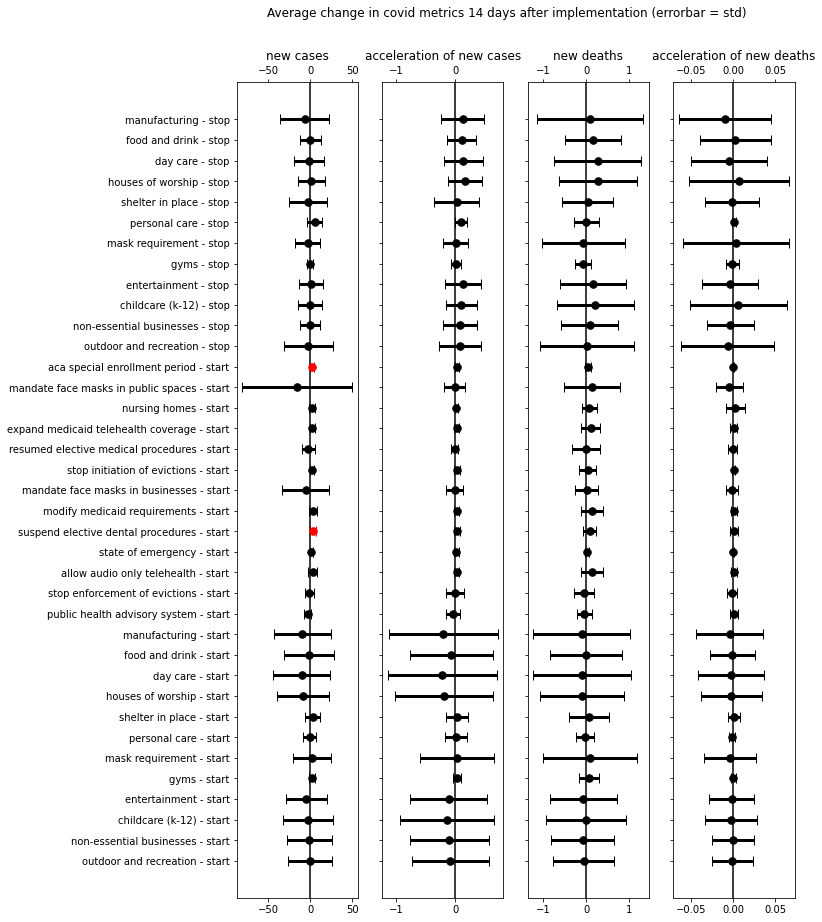

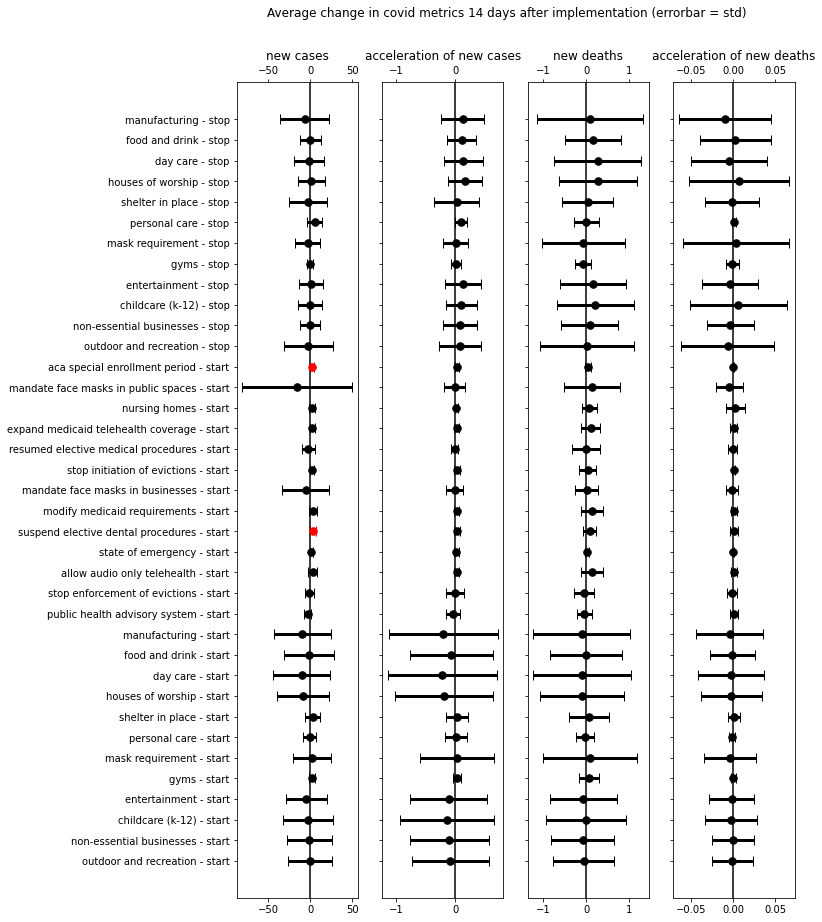

In [6]:
plot_delta_stats(delta_stats,
                 save_figure=True,
                 filename="./figures/average_changes_in_covid_metrics_14_days.png")

After 14 days, there seems to be a signficiant change in new cases 14 days after 'aca-special enrollment period-start', 'suspend elective dental procedues - start' (same with deaths).

Even though these policies give changes that are more than one standard deviation from the mean, I am not convinced that these are actually significant results based on how many show no significance whatsoever and that these policies have relatively small sample sizes compared to the others.

How do these change when we change the measure period?

# 2. Investigate correlations from 1-30 days

In [7]:
def check_significance(delta_stats):
    cols_of_interest = ['case',  'case_accel', 'death', 'death_accel']
    for col in cols_of_interest:
        delta_stats[f"{col}_significant"] = (np.abs(delta_stats[f"{col}_avg"]) -\
                                                np.abs(delta_stats[f"{col}_std"])) > 0
    return delta_stats
delta_stats = check_significance(delta_stats)

In [8]:
delta_stats

,case_avg,case_accel_avg,death_avg,death_accel_avg,case_std,case_accel_std,death_std,death_accel_std,num_samples,case_significant,case_accel_significant,death_significant,death_accel_significant
outdoor and recreation - start,0.083749,-0.084870,-0.052027,-0.000612,25.788453,0.652765,0.717742,0.024529,242.0,False,False,False,False
non-essential businesses - start,-0.690249,-0.101873,-0.080392,-0.000334,26.229377,0.669155,0.741005,0.025027,224.0,False,False,False,False
childcare (k-12) - start,-2.396181,-0.137638,-0.005815,-0.001858,30.094793,0.794989,0.935630,0.030833,190.0,False,False,False,False
entertainment - start,-4.400087,-0.109751,-0.063835,-0.001431,24.487339,0.653278,0.781865,0.026471,196.0,False,False,False,False
gyms - start,2.474464,0.025350,0.066675,0.000561,3.471278,0.064023,0.237686,0.002697,49.0,False,False,False,False
mask requirement - start,1.859162,0.024191,0.089431,-0.003418,22.609965,0.632473,1.102085,0.031369,245.0,False,False,False,False
personal care - start,-0.609563,0.011759,-0.026595,-0.000914,7.856442,0.193903,0.205359,0.003366,43.0,False,False,False,False
shelter in place - start,2.966942,0.024434,0.070543,0.001311,8.866756,0.187884,0.466176,0.007125,456.0,False,False,False,False
houses of worship - start,-8.049913,-0.190068,-0.097821,-0.001930,30.703767,0.832435,0.989128,0.036282,121.0,False,False,False,False
day care - start,-10.028113,-0.219763,-0.095487,-0.001991,33.379376,0.929491,1.142155,0.039120,87.0,False,False,False,False


In [9]:
def count_significant(delta_stats):
    cols_of_interest = ['case',  'case_accel', 'death', 'death_accel']
    res = {col: [] for col in cols_of_interest}
    for policy in delta_stats.index:
        for col in cols_of_interest:
            if delta_stats.loc[policy, f"{col}_significant"]:
                res[col].append(policy)
    return res

count_significant(delta_stats)

{'case': ['suspend elective dental procedures - start',
  'aca special enrollment period - start'],
 'case_accel': [],
 'death': [],
 'death_accel': []}

In [10]:
results = dict()

with warnings.catch_warnings():
    warnings.simplefilter("ignore") # lots of numpy warnings for mean of empty slice
    for measure_period in tqdm(range(1, 31)):
        correlated_df, state_cases_dict = calculate_deltas(
            case_df = case_data,
            policy_df = policy_data,
            measure_period = measure_period,
        )
        delta_stats = calc_delta_stats(correlated_df,
                                       measure_period=measure_period,
                                       min_samples=3)
        delta_stats = check_significance(delta_stats)
        results[measure_period] = count_significant(delta_stats)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [11]:
cols_of_interest = ['case',  'case_accel', 'death', 'death_accel']
results_counts = {num: {
    col: len(results[num][col]) for col in cols_of_interest
} for num in results.keys()}

In [12]:
results_counts

{1: {'case': 2, 'case_accel': 2, 'death': 0, 'death_accel': 2},
 2: {'case': 2, 'case_accel': 2, 'death': 2, 'death_accel': 2},
 3: {'case': 2, 'case_accel': 2, 'death': 2, 'death_accel': 0},
 4: {'case': 4, 'case_accel': 2, 'death': 2, 'death_accel': 1},
 5: {'case': 2, 'case_accel': 2, 'death': 3, 'death_accel': 0},
 6: {'case': 2, 'case_accel': 0, 'death': 3, 'death_accel': 0},
 7: {'case': 2, 'case_accel': 4, 'death': 2, 'death_accel': 2},
 8: {'case': 3, 'case_accel': 2, 'death': 2, 'death_accel': 2},
 9: {'case': 3, 'case_accel': 2, 'death': 2, 'death_accel': 0},
 10: {'case': 4, 'case_accel': 2, 'death': 2, 'death_accel': 0},
 11: {'case': 4, 'case_accel': 3, 'death': 2, 'death_accel': 0},
 12: {'case': 4, 'case_accel': 0, 'death': 2, 'death_accel': 0},
 13: {'case': 4, 'case_accel': 2, 'death': 2, 'death_accel': 0},
 14: {'case': 4, 'case_accel': 0, 'death': 3, 'death_accel': 0},
 15: {'case': 4, 'case_accel': 2, 'death': 2, 'death_accel': 1},
 16: {'case': 3, 'case_accel': 2, 

They all seem to be pretty evenly spread. It looks like this analysis of the differences may not be a good way to model the problem. 